# **ДЗ №1 STEM. Алексеев Виталий**

## **0 Загрузка данных**

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/Raven-ES1617/cu/refs/heads/main/science_studio/whole_data_practice3.csv')
df

,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,e_rpmag,ipmag,e_ipmag,fuv_mag,nuv_mag,err,present,type,min_mag,max_mag
0,129.872235,18.219273,6,10.388,0.033,11.080,0.024,13.351,3.579,12.599,3.330,10.066,0.031,22.017,15.786,4.888841,0,NaN,NaN,NaN
1,143.755605,4.997145,5,14.104,0.053,14.767,0.040,14.272,0.209,15.754,4.109,13.373,0.773,23.920,19.509,4.186825,0,NaN,NaN,NaN
2,141.550218,2.826565,5,12.346,0.046,12.909,0.045,12.494,0.197,14.430,3.722,11.920,0.520,23.090,16.583,3.763859,0,NaN,NaN,NaN
3,143.899031,4.676475,4,13.661,0.041,14.127,0.041,13.766,0.181,15.375,3.672,13.049,0.672,24.091,17.881,3.737819,0,NaN,NaN,NaN
4,141.728736,2.834912,4,13.468,0.077,14.042,0.048,13.634,0.208,15.422,3.632,13.227,0.000,22.714,17.651,3.639082,1,RS,13.29,13.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64983,121.733932,34.774408,5,8.090,0.000,9.274,0.000,8.712,0.000,7.674,0.000,7.320,0.000,23.701,16.685,0.000000,0,NaN,8.39,8.43
64984,164.209694,5.631360,6,9.012,0.000,9.501,0.000,9.185,0.000,8.873,0.000,8.775,0.000,20.023,13.518,0.000000,0,NaN,8.39,8.43
64985,197.822409,-3.915387,3,8.558,0.000,9.722,0.000,9.115,0.000,8.152,0.000,7.835,0.000,22.929,16.748,0.000000,0,NaN,8.39,8.43
64986,216.499182,6.938758,4,9.354,0.000,9.858,0.000,9.633,0.000,9.306,0.000,9.203,0.000,18.501,13.158,0.000000,0,NaN,8.39,8.43


## **1 Нормализация z-score & max-min**

In [3]:
df_stage_1 = df.copy().loc[
    :, ["Bmag", "Vmag", "gpmag", "fuv_mag"]
]

for column_name in df_stage_1.columns:
    column_position = df_stage_1.columns.get_loc(column_name)
    column = df_stage_1.loc[:, column_name]
    column_min, column_max, column_ptp = np.min(column), np.max(column), np.ptp(column)

    df_stage_1.insert(column_position + 1, f"{column_name}_zcore", stats.zscore(column))
    df_stage_1.insert(
        column_position + 2, f"{column_name}_max-min",
        column.map(lambda x: (x - column_min) / column_ptp)
    )

df_stage_1

,Bmag,Bmag_zcore,Bmag_max-min,Vmag,Vmag_zcore,Vmag_max-min,gpmag,gpmag_zcore,gpmag_max-min,fuv_mag,fuv_mag_zcore,fuv_mag_max-min
0,11.080,-1.324314,0.368263,10.388,-1.413273,0.376124,13.351,0.013065,0.596171,22.017,0.003400,0.780261
1,14.767,0.566666,0.676360,14.104,0.558314,0.703756,14.272,0.497227,0.677060,23.920,1.064826,0.927917
2,12.909,-0.386260,0.521100,12.346,-0.374423,0.548757,12.494,-0.437453,0.520903,23.090,0.601882,0.863516
3,14.127,0.238424,0.622880,13.661,0.323273,0.664698,13.766,0.231227,0.632619,24.091,1.160204,0.941186
4,14.042,0.194830,0.615777,13.468,0.220874,0.647681,13.634,0.161836,0.621026,22.714,0.392162,0.834342
...,...,...,...,...,...,...,...,...,...,...,...,...
64983,9.274,-2.250570,0.217348,8.090,-2.632516,0.173514,8.712,-2.425621,0.188741,23.701,0.942676,0.910925
64984,9.501,-2.134147,0.236317,9.012,-2.143333,0.254805,9.185,-2.176969,0.230283,20.023,-1.108782,0.625543
64985,9.722,-2.020801,0.254784,8.558,-2.384210,0.214777,9.115,-2.213767,0.224135,22.929,0.512081,0.851024
64986,9.858,-1.951050,0.266149,9.354,-1.961879,0.284959,9.633,-1.941459,0.269629,18.501,-1.957699,0.507449


array([[<Axes: title={'center': 'Bmag'}>,
        <Axes: title={'center': 'Bmag_zcore'}>,
        <Axes: title={'center': 'Bmag_max-min'}>],
       [<Axes: title={'center': 'Vmag'}>,
        <Axes: title={'center': 'Vmag_zcore'}>,
        <Axes: title={'center': 'Vmag_max-min'}>],
       [<Axes: title={'center': 'gpmag'}>,
        <Axes: title={'center': 'gpmag_zcore'}>,
        <Axes: title={'center': 'gpmag_max-min'}>],
       [<Axes: title={'center': 'fuv_mag'}>,
        <Axes: title={'center': 'fuv_mag_zcore'}>,
        <Axes: title={'center': 'fuv_mag_max-min'}>]], dtype=object)

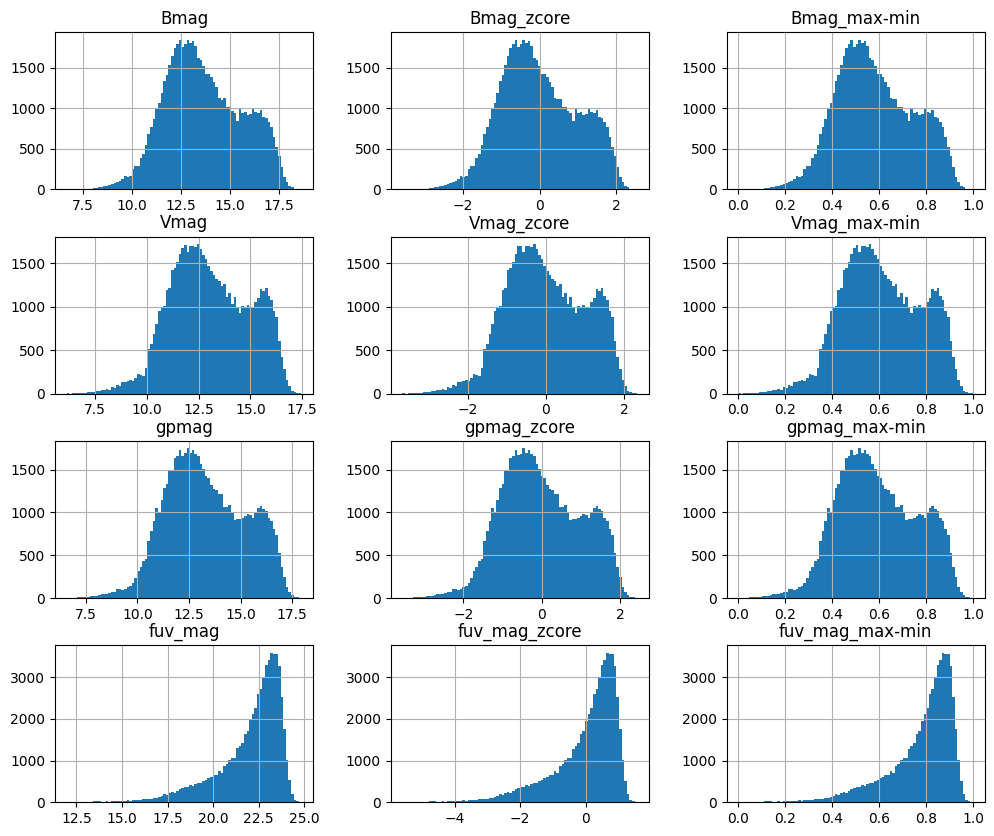

In [4]:
df_stage_1.describe(
    percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
).drop(['count', 'min', 'max'])

df_stage_1.hist(figsize=(12, 10), bins=90)

Можно заметить, что величина `fuv_mag` имеет сильное отклонение от распределения остальных величин (перевес вправо). Также есть небольшое различие в нормировках `max-min`: величина `Bmag` не имеет второго характерного пика. Отсюда следует, что величина `fuv_mag` может стать сильной помехой для регрессионных методов и других, которые в основном полагаются на данные и их распределение, корреляцию.

## **2 Квантили и хвосты (глубокая проверка)**

In [5]:
df_stage_2 = df.copy().loc[
    :, ["Bmag", "Vmag", "nuv_mag", "fuv_mag"]
].quantile(
    [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
)
df_stage_2.loc['tail_ratio'] = (
        (df_stage_2.loc[0.99] - df_stage_2.loc[0.95]) /
        (df_stage_2.loc[0.05] - df_stage_2.loc[0.01])
)
df_stage_2

,Bmag,Vmag,nuv_mag,fuv_mag
0.001,8.127935,7.286922,12.558961,13.237584
0.01,9.500870,8.735870,13.519870,16.012000
0.05,10.752000,10.212000,14.512000,18.297000
0.1,11.292000,10.722000,15.125000,19.439000
0.25,12.225000,11.656000,16.086000,21.269000
0.5,13.434000,12.887000,17.098000,22.554000
0.75,15.142250,14.579000,18.435000,23.283000
0.9,16.520000,15.733000,20.479000,23.686000
0.95,16.998000,16.100000,21.351000,23.871000
0.99,17.561000,16.554130,22.486000,24.172000


Более остальных, ассиметрия выражена у `fuv_mag`, а также `nuv_mag` -- ассиметрия вправо.

## **3 Выбросы: IQR и правило n сигм**

In [6]:
df_stage_3 = df.copy().loc[
    :, ["Bmag", "Vmag", "fuv_mag"]
]

filtered_indexes = set()
for column_name in df_stage_3.columns:
    column_position = df_stage_3.columns.get_loc(column_name)
    column = df_stage_3.loc[:, column_name].copy()
    iqr = stats.iqr(column)
    first_quartile = np.percentile(column, 25)
    third_quartile = np.percentile(column, 75)

    filtered_IQR = column.loc[
        (column < first_quartile - 1.5 * iqr) | (column > third_quartile + 1.5 * iqr)
    ]
    filtered_sigma_3 = column.loc[abs(stats.zscore(column)) > 3]
    filtered_sigma_5 = column.loc[abs(stats.zscore(column)) > 5]
    print(
        f"{column_name: <10} IQR: {len(filtered_IQR) / len(column) * 100:.4f}%, sigma_3: {len(filtered_sigma_3) / len(column) * 100:.4f}%, sigma_5: {len(filtered_sigma_5) / len(column) * 100:.4f}%"
    )

    filtered_indexes.update(filtered_IQR.index)
    filtered_indexes.update(filtered_sigma_3.index)

Bmag       IQR: 0.0646%, sigma_3: 0.0615%, sigma_5: 0.0000%
Vmag       IQR: 0.0985%, sigma_3: 0.1246%, sigma_5: 0.0000%
fuv_mag    IQR: 4.8270%, sigma_3: 1.4957%, sigma_5: 0.0785%


Больше всего выбросов выявлено по метрике IQR и sigma 3, тогда выведем выбросы согласно этой метрике.

In [7]:
filtered_data = df.loc[
    list(filtered_indexes),
    ["Bmag", "e_Bmag", "Vmag", "e_Vmag", "fuv_mag", "nuv_mag", "min_mag", "max_mag", "present"]
]
filtered_data

,Bmag,e_Bmag,Vmag,e_Vmag,fuv_mag,nuv_mag,min_mag,max_mag,present
32769,14.823,0.021,14.788,0.050,17.339,16.656,10.850,10.880,0
16386,14.599,0.014,14.583,0.050,14.261,14.435,14.630,14.700,1
16390,14.521,0.075,14.460,0.034,16.552,15.948,12.160,12.190,0
32777,10.796,0.042,10.592,0.033,17.097,13.742,14.410,14.440,0
16399,9.997,0.049,9.767,0.000,15.012,12.837,9.120,0.030,0
...,...,...,...,...,...,...,...,...,...
32748,8.066,0.015,7.644,0.059,16.888,12.378,10.850,10.880,0
57324,13.366,0.037,12.406,0.031,17.181,16.746,13.460,13.490,0
32752,15.352,0.081,14.407,0.010,17.892,17.310,10.850,10.880,0
32757,11.696,0.041,11.505,0.051,16.049,14.323,10.850,10.880,0


In [8]:
df_stage_3_stats = df_stage_3.agg(["mean", "median"])
df_stage_3_updated_stats = df_stage_3.drop(index=filtered_indexes).agg(["mean", "median"])

df_stage_3_stats.loc["mean"] = (
    df_stage_3_stats.loc["mean"] - df_stage_3_updated_stats.loc["mean"]
                               ) / df_stage_3_stats.loc["mean"] * 100
df_stage_3_stats.loc["median"] = (
    df_stage_3_stats.loc["median"] - df_stage_3_updated_stats.loc["median"]
                                 ) / df_stage_3_stats.loc["median"] * 100

df_stage_3_stats

,Bmag,Vmag,fuv_mag
mean,-0.246563,-0.150087,-1.189407
median,-0.048385,0.007760,-0.394608


В таблице приведена информация об изменениях статистик после удаления выбросов в процентных пунктах, больше всего это коснулось `fuv_mag`: среднее упало ~1%, медиана на ~0,4%, что существенно для устойчивой к выбросам статистике. Остальные значения незначительно изменили свои значения, изменнения медиан составили меньше ~0,1%.

In [9]:
df.drop(filtered_indexes, inplace=True)

## **4 Новый признак**

In [10]:
df["fuv_nuv"] = df["nuv_mag"] - df["fuv_mag"]
df_stage_4 = df.copy()

df_stage_4["fuv_nuv"].quantile([0.01, 0.05, 0.25, 0.33, 0.5, 0.66, 0.75, 0.95])

0.01   -7.392
0.05   -7.000
0.25   -6.263
0.33   -6.015
0.50   -5.407
0.66   -4.516
0.75   -3.616
0.95   -0.757
Name: fuv_nuv, dtype: float64

Исходя из данных о квантилях, можно выделить следующие категории:
* FUV-перевес: $\le4$
* Нейтральный: $<4\le6$
* NUV-перевес: $6$

Выбор сделан на основе того, чтобы категории содержали примерно одинаковое кол-во элемнтов, чтобы не возник дизбаланс классов при дальнейшем обучении моделей классификации.

In [11]:
df_stage_4["fuv_nuv"] = pd.cut(
    df_stage_4["fuv_nuv"], bins=[-2, 4, 6, 10], labels=["FUV-sup", "neutral", "NUV-sup"]
)
df_stage_4

,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,...,ipmag,e_ipmag,fuv_mag,nuv_mag,err,present,type,min_mag,max_mag,fuv_nuv
0,129.872235,18.219273,6,10.388,0.033,11.080,0.024,13.351,3.579,12.599,...,10.066,0.031,22.017,15.786,4.888841,0,NaN,NaN,NaN,NaN
1,143.755605,4.997145,5,14.104,0.053,14.767,0.040,14.272,0.209,15.754,...,13.373,0.773,23.920,19.509,4.186825,0,NaN,NaN,NaN,NaN
2,141.550218,2.826565,5,12.346,0.046,12.909,0.045,12.494,0.197,14.430,...,11.920,0.520,23.090,16.583,3.763859,0,NaN,NaN,NaN,NaN
3,143.899031,4.676475,4,13.661,0.041,14.127,0.041,13.766,0.181,15.375,...,13.049,0.672,24.091,17.881,3.737819,0,NaN,NaN,NaN,NaN
4,141.728736,2.834912,4,13.468,0.077,14.042,0.048,13.634,0.208,15.422,...,13.227,0.000,22.714,17.651,3.639082,1,RS,13.29,13.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64983,121.733932,34.774408,5,8.090,0.000,9.274,0.000,8.712,0.000,7.674,...,7.320,0.000,23.701,16.685,0.000000,0,NaN,8.39,8.43,NaN
64984,164.209694,5.631360,6,9.012,0.000,9.501,0.000,9.185,0.000,8.873,...,8.775,0.000,20.023,13.518,0.000000,0,NaN,8.39,8.43,NaN
64985,197.822409,-3.915387,3,8.558,0.000,9.722,0.000,9.115,0.000,8.152,...,7.835,0.000,22.929,16.748,0.000000,0,NaN,8.39,8.43,NaN
64986,216.499182,6.938758,4,9.354,0.000,9.858,0.000,9.633,0.000,9.306,...,9.203,0.000,18.501,13.158,0.000000,0,NaN,8.39,8.43,NaN


In [12]:
df_stage_4["Bmag-Vmag"] = df_stage_4["Bmag"] - df_stage_4["Vmag"]

In [13]:
df_stage_4_grouped = df_stage_4.groupby("fuv_nuv", observed=True).agg({
    'Bmag': 'count',
    'Bmag-Vmag': 'median',
    'max_mag': 'median',
    'min_mag': 'median',
    'present': lambda x: sum(x)
})

In [14]:
df_stage_4_grouped["present"] /= df_stage_4_grouped["Bmag"]

In [15]:
df_stage_4_grouped.rename(
    columns={
        "Bmag": "Size",
        "Bmag-Vmag": "median_Bmag-Vmag",
        "max_mag": "median_max_mag",
        "min_mag": "median_min_mag",
        "present": "present_freq"
    }, inplace=True)
df_stage_4_grouped

,Size,median_Bmag-Vmag,median_max_mag,median_min_mag,present_freq
fuv_nuv,,,,,
FUV-sup,9332,0.9775,12.73,13.53,0.070939


Все категории имеют примерно одинаковые максимальные и минимальные значения. Стоит отметить, что лишь 2% NUV-перевеса представлены в каталоге, значит это либо точка роста ля поиска новых в этой области, либо повод для того, чтобы исключить ее из рассмотрения.

## **5 Парная корреляция**

In [16]:
df_stage_5 = df.copy()
df_stage_5["B_minus_V"] = df_stage_5["Bmag"] - df_stage_5["Vmag"]

results = {"method": [], "correlation": []}

results["correlation"].append(
    np.corrcoef(df_stage_5["B_minus_V"], df_stage_5["fuv_nuv"])[0, 1]
)
results["method"].append("Полный набор")

Q1_fuv = df_stage_5["fuv_nuv"].quantile(0.25)
Q3_fuv = df_stage_5["fuv_nuv"].quantile(0.75)
IQR_fuv = Q3_fuv - Q1_fuv

Q1_bv = df_stage_5["B_minus_V"].quantile(0.25)
Q3_bv = df_stage_5["B_minus_V"].quantile(0.75)
IQR_bv = Q3_bv - Q1_bv

mask_iqr = (
    (df_stage_5["fuv_nuv"] >= Q1_fuv - 1.5 * IQR_fuv) &
    (df_stage_5["fuv_nuv"] <= Q3_fuv + 1.5 * IQR_fuv) &
    (df_stage_5["B_minus_V"] >= Q1_bv - 1.5 * IQR_bv) &
    (df_stage_5["B_minus_V"] <= Q3_bv + 1.5 * IQR_bv)
)

df_stage_5_iqr = df_stage_5[mask_iqr]

results["correlation"].append(
    np.corrcoef(df_stage_5_iqr["B_minus_V"], df_stage_5_iqr["fuv_nuv"])[0, 1]
)
results["method"].append("IQR-очистка")

df_stage_5["B_snr"] = df_stage_5["Bmag"] / df_stage_5["e_Bmag"]
df_stage_5["V_snr"] = df_stage_5["Vmag"] / df_stage_5["e_Vmag"]

mask_snr = (df_stage_5["B_snr"] > 3) & (df_stage_5["V_snr"] > 3)
df_stage_5_snr = df_stage_5[mask_snr]

results["correlation"].append(
    np.corrcoef(df_stage_5_snr["B_minus_V"], df_stage_5_snr["fuv_nuv"])[0, 1]
)
results["method"].append("Фильтрация по качеству")

pd.DataFrame(results)

,method,correlation
0,Полный набор,0.488550
1,IQR-очистка,0.272849
2,Фильтрация по качеству,0.488550


Нетрудно заметить, что от фильтрации по SNR (отношению измерения к ошике) результат не меняется, знак же не меняется ни при какой обработке.